# Links
- https://forecastegy.com/posts/xgboost-multiclass-classification-python/
- https://github.com/jannine92/spotify_recommendation/blob/main/music_recommender.ipynb
- https://www.kaggle.com/code/nyjoey/spotify-clustering
- https://ausaf-a.github.io/ml-song-recommender/
- https://medium.com/@Marlon_H/spotify-clustering-f41b40003c9a
- https://www.kaggle.com/code/choongqianzheng/song-genre-classification-system
- https://developer.spotify.com/documentation/web-api/reference/get-audio-features


# ToDo List:

- Basic stuff
  - Load Data
  -  Display, Info and Describe data
  - Split Datasets into song_metrics and song_info
- Data Visualization (Also in Percent if valuable)
  - Visualize Correlation Heatmap
  - Display Genres as Numbers and Histogram
  - Display Genre Dendogram
  - Try to plot Sunburst Chart
  - Display most frequent artists
  - Display most popular artist
  - Plot Popularity as histogram
  - Plot Average Song metric for Each genre (could also be on a 3D plot)
  - Plot Box plots to detect outliers
- Features
  - Apply Standard and MinMaxScaler 
  - Apply and Visualize PCA and t-SNE
  - Use Silhouette Score to see how many clusters are needed (also try fancy plot from Medium)
  - Use KMeans to start
  - Use DBSCAN
  - Use Agglomerative Clustering
  - Use HDBSCAN
  - Use XGBClassifier with Cross Validation
- Feature Extensions
  - Plot Similar Artists
  - Plot Similar Genres
  - (Plot Similar Songs [Only small set of Data here])
- Possible Uses:
  - Put song into spotify api, get song data back, and use that to find similar songs (with possibility to get different artists than the one from the provided song)
  - Put Song in, get similar artist (you could also put multiple songs in, but I dont think that this is worth it)
  - Simulate entering a whole user profile, from which we can take the average song data and get new artists this way (which are not in here)
- Things missing
  - We dont have the release date or listening date, so we cannot use time as a feature. This could create even better recommendations, because we would know what the user currently listens to and weigh it  

In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

original_df = pd.read_csv('train.csv')
original_df = original_df.drop(["Unnamed: 0", 'track_id', 'artists', 'album_name', 'track_name'], axis=1)
display(original_df)


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [20]:
print(original_df["track_genre"].isna().sum())

0


In [27]:
display(features)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [14]:
from sklearn.preprocessing import StandardScaler

# Select relevant features
features = original_df.drop(['track_genre'], axis=1)

# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


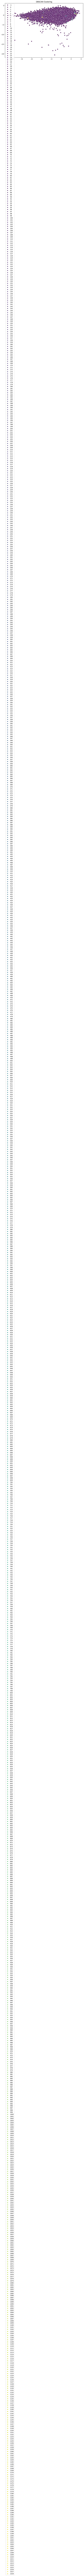

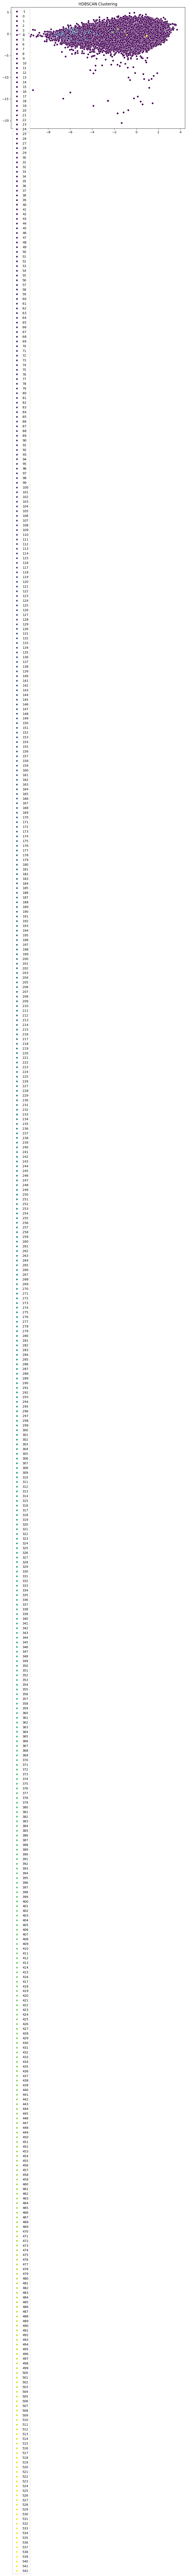

dbscan_cluster  track_genre  
-1              chicago-house    1000
                club             1000
                comedy           1000
                grindcore        1000
                idm              1000
                                 ... 
 1214           swedish             5
 1215           synth-pop           8
 1216           synth-pop           7
 1217           synth-pop          14
 1218           synth-pop          12
Name: count, Length: 4360, dtype: int64


In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import hdbscan
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Assuming your data is in a CSV file
df = pd.read_csv('train.csv')
df = df.drop(["Unnamed: 0", 'track_id', 'artists', 'album_name', 'track_name'], axis=1)
# Drop the 'track_genre' column and store it for later
genres = df['track_genre']
df = df.drop('track_genre', axis=1)

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Dimensionality Reduction (2D)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

# HDBSCAN clustering
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=10, metric='euclidean')
hdbscan_labels = hdbscan_clusterer.fit_predict(df_scaled)

# Plotting DBSCAN results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=dbscan_labels, palette='viridis', legend='full')
plt.title("DBSCAN Clustering")
plt.show()

# Plotting HDBSCAN results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=hdbscan_labels, palette='viridis', legend='full')
plt.title("HDBSCAN Clustering")
plt.show()

# Optional: Map clusters back to genres (for analysis)
df['dbscan_cluster'] = dbscan_labels
df['hdbscan_cluster'] = hdbscan_labels
df['track_genre'] = genres

# Analyze the distribution of genres in each cluster
genre_cluster_analysis = df.groupby('dbscan_cluster')['track_genre'].value_counts()
print(genre_cluster_analysis)


Accuracy: 0.2443859649122807


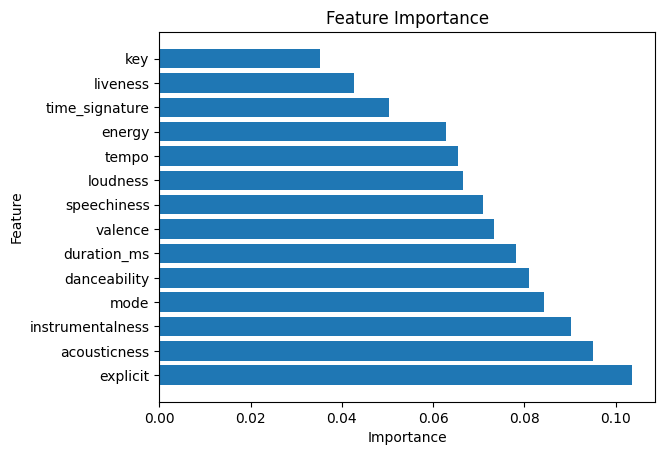

In [34]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('train.csv')
df = df.drop(["Unnamed: 0", 'track_id', 'artists', 'album_name', 'track_name', "popularity"], axis=1)

# Drop the 'track_genre' column and store it for later
df["target"] = df["track_genre"].astype('category').cat.codes
genres = df['target']
df = df.drop(['track_genre', "target"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(df, genres, test_size=0.2, random_state=42)

# Train an XGBoost model
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Optional: Feature Importance
feature_importance = model.feature_importances_
feature_names = df.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

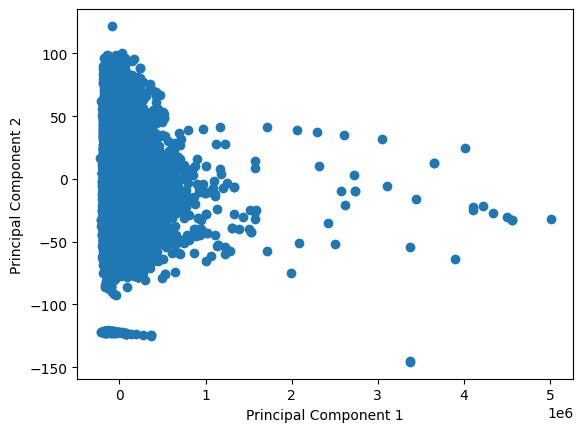

In [29]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)

plt.scatter(principalComponents[:, 0], principalComponents[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

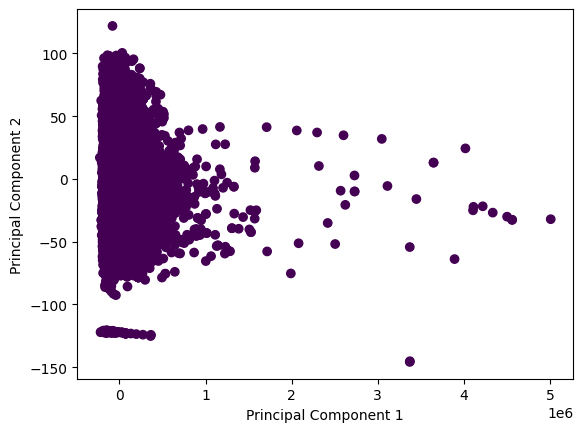

In [30]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=30)
y_dbscan = dbscan.fit_predict(scaled_features)

plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=y_dbscan)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [3]:
import hdbscan

new_df = original_df.copy()

# Instantiate HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, metric='euclidean')

# Fit and predict clusters
cluster_labels = clusterer.fit_predict(scaled_features)

# Add cluster labels to the original dataframe
new_df['cluster'] = cluster_labels


In [18]:
from sklearn.cluster import KMeans

# First stage: K-Means clustering
kmeans = KMeans(n_clusters=114, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

In [26]:
import plotly.figure_factory as ff
from scipy.cluster.hierarchy import linkage, dendrogram
scaled_features = scaled_features.astype('float32')

# Perform hierarchical clustering
Z_genre = linkage(kmeans.cluster_centers_, method='ward')

# Create a dendrogram with Plotly
fig = ff.create_dendrogram(Z_genre, labels=original_df["track_genre"].unique()[:-1], orientation='left')

# Customize the layout for better readability
fig.update_layout(
    width=1000, height=1200,  # Adjust the size based on the number of genres
    title='Interactive Dendrogram of Genres',
    xaxis_title='Distance',
    yaxis_title='Genre'
)

# Display the plot
fig.show()


In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions to 3D using PCA
pca = PCA(n_components=3)
embedding_3d = pca.fit_transform(scaled_features)


In [ ]:
import plotly.express as px

# Create a DataFrame for Plotly
plot_df = genres.copy()
plot_df['x'] = embedding_3d[:, 0]
plot_df['y'] = embedding_3d[:, 1]
plot_df['z'] = embedding_3d[:, 2]

# Plot the 3D scatter plot
fig = px.scatter_3d(plot_df, x='x', y='y', z='z', color='cluster', 
                    hover_name='song_title', hover_data=['genre', 'id'])

# Customize the layout
fig.update_layout(
    title="3D Visualization of HDBSCAN Clusters Using PCA",
    scene = dict(
        xaxis_title='PCA Component 1',
        yaxis_title='PCA Component 2',
        zaxis_title='PCA Component 3'
    ),
    legend_title="Cluster"
)

# Show the plot
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
import umap
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce dimensions to 2D using UMAP
reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_features)

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=genres['cluster'], palette='viridis', s=10)
plt.title('HDBSCAN Clustering of Songs')
plt.show()


AttributeError: module 'umap' has no attribute 'UMAP'

In [ ]:
song_title_df = genres[['song_title', "id"]].copy()

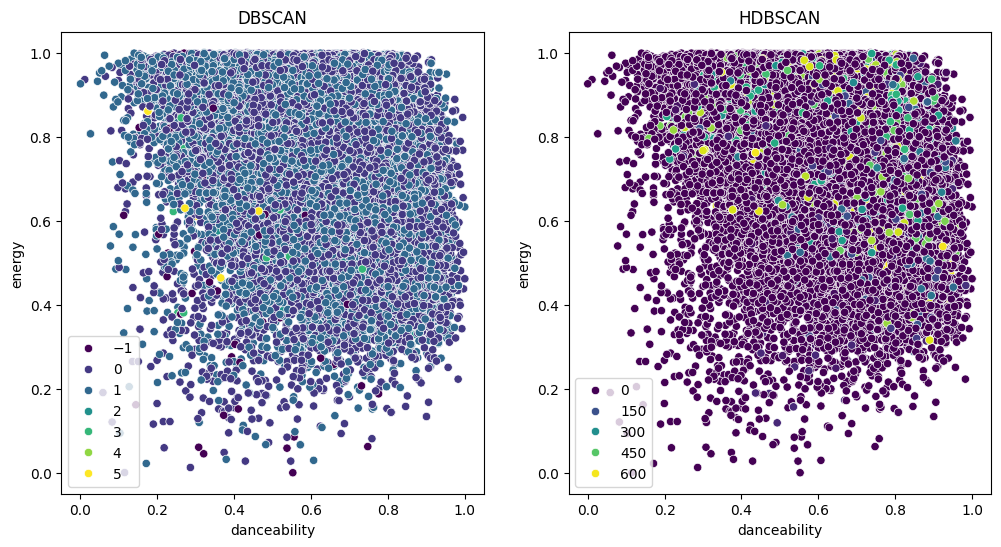

In [ ]:
from sklearn.cluster import KMeans, DBSCAN, HDBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

kmeans_test_df = genres.drop(["song_title", "id"], axis=1).copy()

label_encoder = LabelEncoder()

kmeans_test_df["genre"] = label_encoder.fit_transform(kmeans_test_df["genre"])

x = kmeans_test_df.drop(["genre"], axis=1)
y = kmeans_test_df["genre"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)

cols = kmeans_test_df.columns
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled = pd.DataFrame(x_train_scaled, columns=cols[:-1])
x_test_scaled = pd.DataFrame(x_test_scaled, columns=cols[:-1])

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(x_train_scaled)
dbscan_labels = dbscan.labels_

hdbscan = HDBSCAN(min_cluster_size=5)
hdbscan.fit(x_train_scaled)
hdbscan_labels = hdbscan.labels_

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("DBSCAN")
sns.scatterplot(x=x_train_scaled["danceability"], y=x_train_scaled["energy"], hue=dbscan_labels, palette="viridis")
plt.subplot(1, 2, 2)
plt.title("HDBSCAN")
sns.scatterplot(x=x_train_scaled["danceability"], y=x_train_scaled["energy"], hue=hdbscan_labels, palette="viridis")
plt.show()

